In [2]:
import numpy as np

def estimate_pi(m):
    # Random points in the unit square (x, y)
    # Function to estimate pi using Monte Carlo method
    x = np.random.random(m) # Generating m floating points between [0,1)
    y = np.random.random(m)
    
    # Check how many points fall inside the unit circle
    inside_circle = (x**2 + y**2) <= 1
    return 4 * np.sum(inside_circle) / m  # Estimate of one pi

def calculate_rmse(m, repetitions=500):
    # Function to calculate RMSE for given sample size and number of repetitions
    pi_true = np.pi
    estimates = np.array([estimate_pi(m) for _ in range(repetitions)])
    # Calculate the Root Mean Squared Error (RMSE)
    rmse = np.sqrt(np.mean((estimates - pi_true) ** 2))
    return rmse


In [4]:
# Sample sizes
sample_sizes = [10000, 20000, 40000]

# Repeat the experiment for each sample size and calculate RMSE
rmse_results = {m: calculate_rmse(m) for m in sample_sizes}
print(rmse_results)

{10000: 0.016963365907486573, 20000: 0.011153375733562983, 40000: 0.008001133666579417}


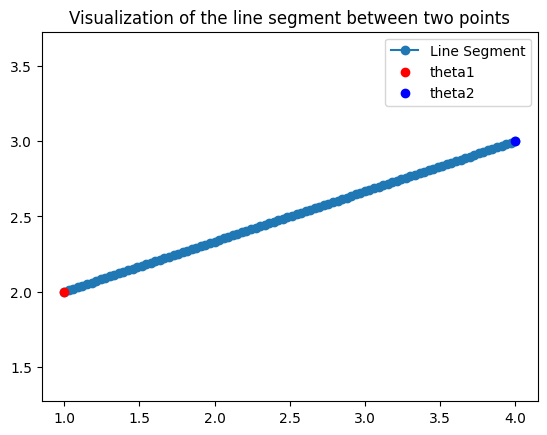

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 定义两个点 theta1 和 theta2
theta1 = np.array([1, 2])
theta2 = np.array([4, 3])

# 生成一系列 alpha 值
alphas = np.linspace(0, 1, 100)

# 对每个 alpha，计算 alpha*theta1 + (1-alpha)*theta2
points = [alpha * theta1 + (1 - alpha) * theta2 for alpha in alphas]
points = np.array(points)

# 绘制线段
plt.plot(points[:, 0], points[:, 1], '-o', label='Line Segment')

# 绘制端点
plt.scatter(theta1[0], theta1[1], color='red', zorder=5, label='theta1')
plt.scatter(theta2[0], theta2[1], color='blue', zorder=5, label='theta2')

plt.axis('equal')
plt.legend()
plt.title('Visualization of the line segment between two points')
plt.show()

这是重要性采样（Importance Sampling）中使用的一个标准一致性结果，说明当样本数量 $m \to \infty$ 时，归一化加权和（即 $\hat{\Pi}_2$）几乎处处收敛于目标期望 $\int h(x)f(x)dx$。我们来 严格地进行数学证明：

给定试验分布 q(x)，目标分布 f(x)，我们有

$$\hat{\Pi}2 := \frac{\sum_{j=1}^m w^{(j)} h(x^{(j)})}{\sum_{j=1}^m w^{(j)}}, \quad \text{where } w^{(j)} = \frac{f(x^{(j)})}{q(x^{(j)})},\ x^{(j)} \sim q(x),$$

我们要证明：

$$
\hat{\Pi}_2 \xrightarrow{a.s.} \int h(x)f(x) dx
$$

证明：

考虑两个序列：
* $A_m := \frac{1}{m} \sum_{j=1}^m w^{(j)} h(x^{(j)}) = \frac{1}{m} \sum_{j=1}^m \frac{f(x^{(j)})}{q(x^{(j)})} h(x^{(j)})$
* $B_m := \frac{1}{m} \sum_{j=1}^m w^{(j)} = \frac{1}{m} \sum_{j=1}^m \frac{f(x^{(j)})}{q(x^{(j)})}$

那么，

$$\hat{\Pi}_2 = \frac{A_m}{B_m}$$

注意到 $x^{(j)} \sim q(x)$ 独立同分布，于是：

$$ A_m \xrightarrow{a.s.} \mathbb{E}_q\left[ \frac{f(x)}{q(x)} h(x) \right] = \int h(x) f(x) dx $$
$$ B_m \xrightarrow{a.s.} \mathbb{E}_q\left[ \frac{f(x)}{q(x)} \right] = \int f(x) dx = 1 $$

其中，两个收敛都由 **强大数法则（Strong Law of Large Numbers, SLLN** 得到，只要：
* \mathbb{E}_q\left[ \left| \frac{f(x)}{q(x)} h(x) \right| \right] < \infty，即 \int |h(x)| f(x) dx < \infty
* \mathbb{E}_q\left[ \frac{f(x)}{q(x)} \right] < \infty，这总是成立（因为 \int f(x) dx = 1）

因此，使用极限的商法则（连续映射定理）：

\[
\frac{A_m}{B_m} \xrightarrow{a.s.} \frac{\int h(x)f(x)dx}{1} = \int h(x)f(x) dx
\]

收敛式子是：

$$
\frac{ \sum_{j=1}^m \tilde{w}^{(j)} h(x^{(j)}) }{ \sum_{j=1}^m \tilde{w}^{(j)} } \overset{a.s.}{\longrightarrow} \int h(x) f(x) dx
$$

⸻

解释思路：

其实你可以类比到原本的 importance sampling 理论。回忆：
* 原本 importance sampling 是基于：$w^{(j)} = f(x^{(j)})/q(x^{(j)})$
* 而我们知道只要 $w^{(j)}$ 是正确的 importance weight，且 h(x) f(x) 积分是有限的，就有
$$
\frac{\sum_{j=1}^m w^{(j)} h(x^{(j)})}{\sum_{j=1}^m w^{(j)}} \overset{a.s.}{\longrightarrow} \int h(x)f(x)dx
$$
这个是基本的 强大数定律（Strong Law of Large Numbers under importance sampling）。

⸻

而现在我们换成了 $\tilde{w}^{(j)}$ ——
只要 $\tilde{w}^{(j)}$ 的期望是正确的 $w^{(j)}$，它本质上还是个 unbiased estimator！

所以思路是这样的：
* 你可以把 $\tilde{w}^{(j)}$ 看成 $w^{(j)}$ 的 noisy version；
但它在 x^{(j)} 给定时满足
\mathbb{E}[\tilde{w}^{(j)} | x^{(j)}] = w^{(j)}
所以在大数定律下，仍然有一样的收敛效果。

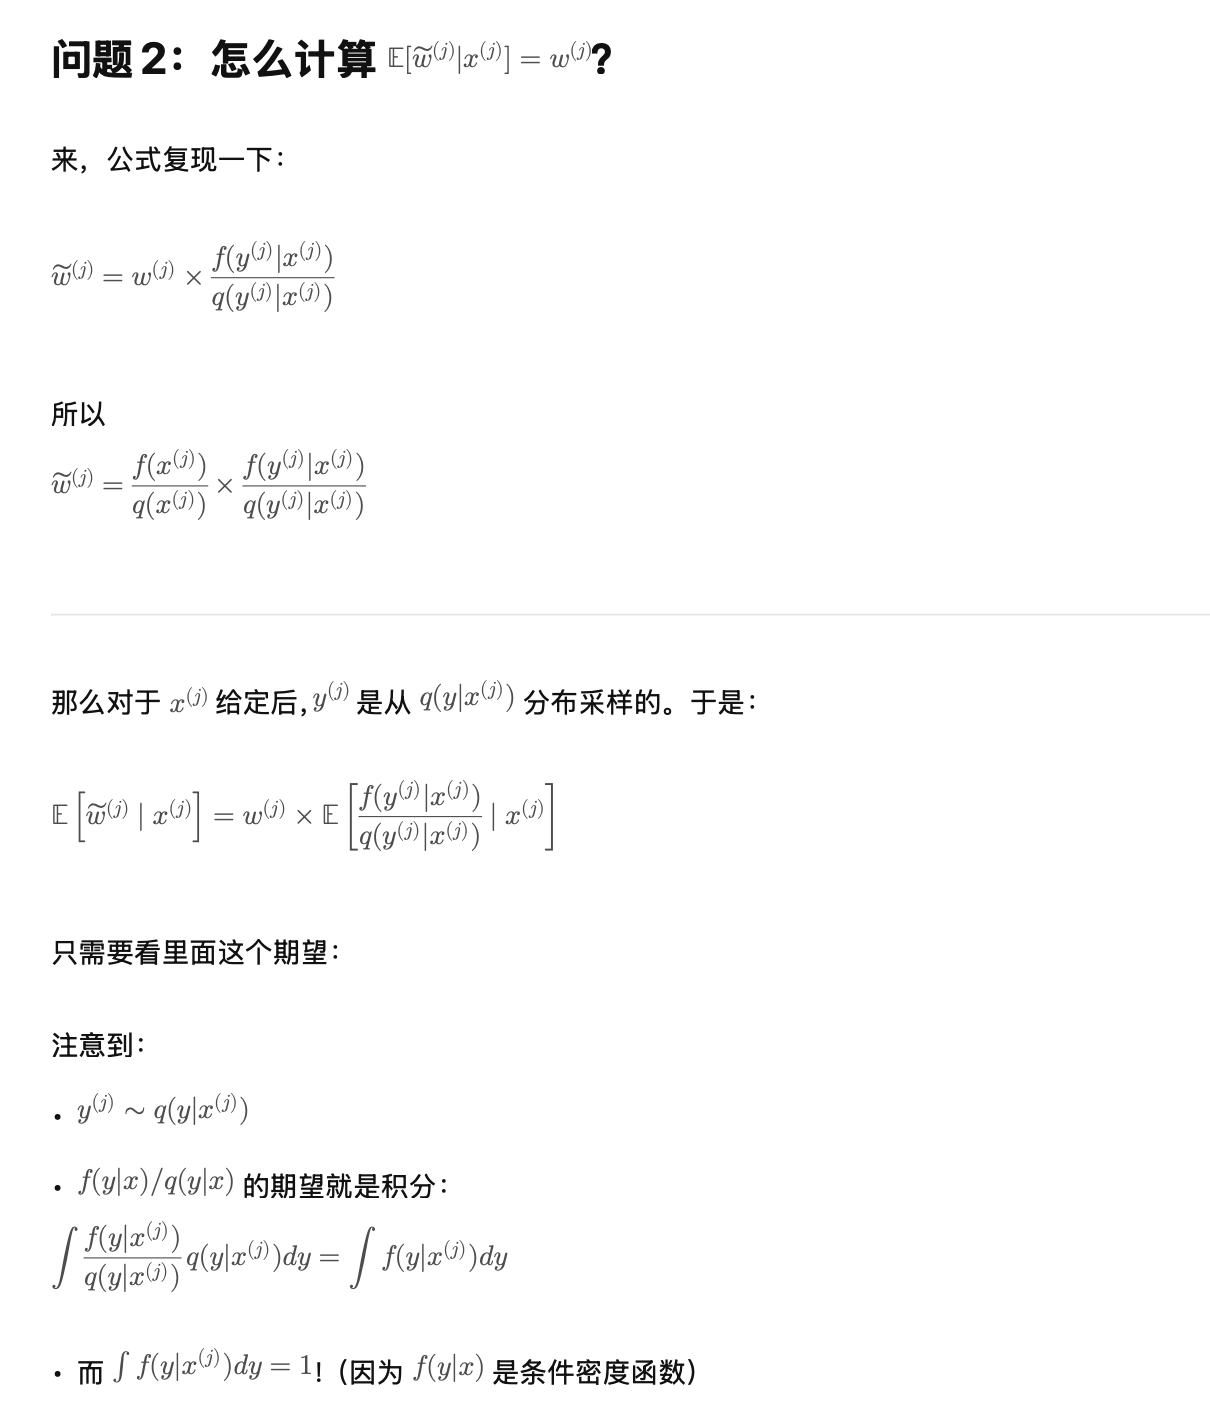

由定义，
$\tilde{w}^{(j)} = w^{(j)} \times \frac{f(y^{(j)}|x^{(j)})}{q(y^{(j)}|x^{(j)})}$
且
$\mathbb{E}\left[ \tilde{w}^{(j)} \mid x^{(j)} \right] = w^{(j)}
\quad \text{(已经在上一个回答推导过)}$

同理，

$\mathbb{E}\left[ \tilde{w}^{(j)} h(x^{(j)}) \mid x^{(j)} \right] = w^{(j)} h(x^{(j)})$

所以
$\mathbb{E}\left[ \tilde{w}^{(j)} h(x^{(j)}) \right] = \mathbb{E}\left[ w^{(j)} h(x^{(j)}) \right]$

同样地，
$\mathbb{E}\left[ \tilde{w}^{(j)} \right] = \mathbb{E}\left[ w^{(j)} \right]$

这表示：
$\tilde{w}^{(j)} h(x^{(j)}) 的均值和 w^{(j)} h(x^{(j)}) 相同
\tilde{w}^{(j)} 的均值和 w^{(j)} 相同$

那么，由强大数定律（SLLN），分别有：

$$
\frac{1}{m} \sum_{j=1}^m \tilde{w}^{(j)} h(x^{(j)}) \overset{a.s.}{\longrightarrow} \mathbb{E}[w^{(j)} h(x^{(j)})]
$$
和
$$
\frac{1}{m} \sum_{j=1}^m \tilde{w}^{(j)} \overset{a.s.}{\longrightarrow} \mathbb{E}[w^{(j)}]
$$


$$
\frac{1}{n} \sum_{i=1}^n X_i \xrightarrow{\text{a.s.}} \mu
$$

设 $X_1, X_2, \ldots$ 是一列 i.i.d. 随机变量，且 $\mathbb{E}[X_i] = \mu$ 有限，那么有：

$$
\frac{1}{n} \sum_{i=1}^n X_i \xrightarrow{p} \mu
$$

* 平均值 $\frac{1}{n} \sum_{i=1}^n X_i $以概率收敛到期望 $\mu$，也叫收敛于概率。
* 具体是说：对任何 $\varepsilon > 0$，
$\lim_{n\to\infty} \mathbb{P}\left( \left| \frac{1}{n}\sum_{i=1}^n X_i - \mu \right| > \varepsilon \right) = 0$

为什么可以直接按
$$
p(x_T) = \frac{V_T(x_T)}{B}
$$
去抽样？

是不是有点像：
	•	$V_T(x_T)$本来只是一个“量”，
	•	为什么直接除以$B$归一化一下，就说是$p(x_T)$了？
（你的敏感度很对）

⸻

答案是：因为根据定义，$V_T(x_T)$本来就是$p(x_{0:T})$在固定$x_T$之后，剩下变量边缘化出来的结果。

完整推导是：

⸻

Step 1：Recall $V_T(x_T)$的定义

前一张slide里定义了：
$$
V_T(x_T) = \sum_{x_0,\dots,x_{T-1} \in \mathcal{S}} \exp\left( -\sum_{t=1}^{T} h_t(x_{t-1},x_t) \right)
$$
即：
	•	固定$x_T$，
	•	把所有之前$x_0,\dots,x_{T-1}$的路径可能性累加。

⸻

Step 2：Recall $p(x_{0:T})$的整体公式

从Gibbs分布我们知道
$$
p(x_{0:T}) = \frac{1}{B} \exp\left( -\sum_{t=1}^{T} h_t(x_{t-1},x_t) \right)
$$
所以
$\exp(-\sum h)$只是p的非标准化密度，B是标准化常数。

⸻

Step 3：推出 $p(x_T)$

要得到 $p(x_T)$，你要对$x_0,x_1,\dots,x_{T-1}$做边缘积分（离散情形是求和）：
$$
p(x_T) = \sum_{x_0,\dots,x_{T-1}} p(x_{0:T})
$$
代入 $p(x_{0:T}) = \frac{1}{B}\exp\left( -\sum_{t=1}^T h_t(x_{t-1},x_t) \right)$：

得到
$$
p(x_T) = \frac{1}{B} \sum_{x_0,\dots,x_{T-1}} \exp\left( -\sum_{t=1}^T h_t(x_{t-1},x_t) \right)
$$

你看到了吗？
	•	分子就是$V_T(x_T)$，
	•	分母就是$B$。

所以：
$$
p(x_T) = \frac{V_T(x_T)}{B}
$$
严格成立！

在知道了 $x_T$ 后，为什么可以按
$$
p(x_t \mid x_{t+1}) \propto V_t(x_t) \exp\left( -h_{t+1}(x_t,x_{t+1}) \right)
$$
这样的条件分布去一步步地采样？

⸻

我来慢慢一步步推导：

⸻

Step 1：我们要采样什么？

我们目标是从$p(x_{0:T})$抽完整的一条路径 $x_0,x_1,\dots,x_T$。

我们已经生成了$x_T$，现在想根据$x_T$抽$x_{T-1}$。

所以需要知道条件分布：
$$
p(x_{T-1} \mid x_T)
$$

再抽到$x_{T-1}$以后，根据$x_{T-1}, x_T$去抽$x_{T-2}$，以此类推。

⸻

Step 2：从联合分布写条件分布

基本概率论告诉我们：
$$
p(x_{T-1} \mid x_T) = \frac{p(x_{T-1}, x_T)}{p(x_T)}
$$

而
$$
p(x_{T-1},x_T) = \sum_{x_0,\dots,x_{T-2}} p(x_0,x_1,\dots,x_{T-2},x_{T-1},x_T)
$$

记得：$p(x_{0:T})$是
$$
p(x_{0:T}) = \frac{1}{B} \exp\left( -\sum_{t=1}^T h_t(x_{t-1},x_t) \right)
$$
所以
$$
p(x_0,x_1,\dots,x_{T-2},x_{T-1},x_T) = \frac{1}{B} \exp\left( -\sum_{t=1}^T h_t(x_{t-1},x_t) \right)
$$

⸻

Step 3：把分子$p(x_{T-1}, x_T)$拆开

特别地，注意：

$\sum_{t=1}^T h_t(x_{t-1},x_t)$可以拆成：
* 第一部分：$h_1(x_0,x_1)+h_2(x_1,x_2)+\dots+h_{T-1}(x_{T-2},x_{T-1})$
* 第二部分：$h_T(x_{T-1},x_T)$

所以写成：
$$
\sum_{t=1}^T h_t(x_{t-1},x_t) = \left(\sum_{t=1}^{T-1} h_t(x_{t-1},x_t)\right) + h_T(x_{T-1},x_T)
$$

⸻

所以分子 $p(x_{T-1}, x_T)$就是
$$p(x_{T-1}, x_T) = \frac{1}{B} \left( \sum_{x_0,\dots,x_{T-2}} \exp\left( -\sum_{t=1}^{T-1} h_t(x_{t-1},x_t) \right) \right) \exp\left( - h_T(x_{T-1},x_T) \right)$$
注意这里：
* 前面那个求和（即固定$x_{T-1}$以后，所有$x_0,\dots,x_{T-2}$的累加）
* 乘上最后一步的 $\exp(-h_T(x_{T-1},x_T))$

⸻

Step 4：引入 $V_{T-1}(x_{T-1})$

注意：
$$
V_{T-1}(x_{T-1}) = \sum_{x_0,\dots,x_{T-2}} \exp\left( -\sum_{t=1}^{T-1} h_t(x_{t-1},x_t) \right)
$$
——正好就是你上面括号里的那一坨！

所以：
$$
p(x_{T-1}, x_T) = \frac{1}{B} V_{T-1}(x_{T-1}) \exp\left( -h_T(x_{T-1},x_T) \right)
$$

⸻

Step 5：分母$p(x_T)$

前面已经知道：
$$
p(x_T) = \frac{V_T(x_T)}{B}
$$

所以
$$
p(x_{T-1} \mid x_T) = \frac{p(x_{T-1},x_T)}{p(x_T)} = \frac{V_{T-1}(x_{T-1})\exp\left(-h_T(x_{T-1},x_T)\right)}{V_T(x_T)}
$$

⸻

✅ 这就严格推导出来了！

所以最终：

$$p(x_{T-1} \mid x_T) \propto V_{T-1}(x_{T-1}) \exp\left( -h_T(x_{T-1},x_T) \right)$$

我们想要根据 $x_{t+1}^{(j)}, x_{t+2}^{(j)}, \dots, x_T^{(j)}$ 抽样出 $x_t^{(j)}$，即：

要知道：
$$p\left(x_t \mid x_{t+1}^{(j)}, x_{t+2}^{(j)}, \dots, x_T^{(j)}\right)$$

⸻

根据概率论基本公式：
$$p\left(x_t \mid x_{t+1:T}^{(j)}\right) = \frac{p\left(x_t, x_{t+1:T}^{(j)}\right)}{p\left(x_{t+1:T}^{(j)}\right)}$$

其中：
	•	分子是联合概率
	•	分母是归一化常数

⸻

Step 1: 写出 $p(x_{0:T})$ 的形式

前面我们知道，$p(x_{0:T})$是：
$$p(x_{0:T}) \propto \exp\left( -\sum_{s=1}^T h_s(x_{s-1},x_s) \right)$$

所以，
$$p(x_0,x_1,\dots,x_T) = \frac{1}{B} \exp\left( -\sum_{s=1}^T h_s(x_{s-1},x_s) \right)$$
其中 $B$ 是归一化常数。

⸻

Step 2: 写出 $p(x_t,x_{t+1:T})$

$p(x_t,x_{t+1:T})$ 是什么呢？

要把 $x_t$ 固定住，同时后面接着 $x_{t+1},x_{t+2},\dots,x_T$。

那么：
$$p(x_t,x_{t+1:T}) = \sum_{x_0,\dots,x_{t-1}} p(x_0,\dots,x_{t-1},x_t,x_{t+1},\dots,x_T)$$

就是对前面$x_0,\dots,x_{t-1}$求和。

⸻

所以展开就是：
$$p(x_t,x_{t+1:T}) = \frac{1}{B} \sum_{x_0,\dots,x_{t-1}} \exp\left( -\sum_{s=1}^T h_s(x_{s-1},x_s) \right)$$

而
$\sum_{s=1}^T h_s(x_{s-1},x_s)$
可以拆成：
$\left( \sum_{s=1}^{t} h_s(x_{s-1},x_s) \right) + h_{t+1}(x_t,x_{t+1}) + \left( \sum_{s=t+2}^{T} h_s(x_{s-1},x_s) \right)$

所以可以写成：
$$\exp\left( -\sum_{s=1}^T h_s(x_{s-1},x_s) \right) = \exp\left( -\sum_{s=1}^t h_s(x_{s-1},x_s) \right) \times \exp\left( -h_{t+1}(x_t,x_{t+1}) \right) \times \exp\left( -\sum_{s=t+2}^T h_s(x_{s-1},x_s) \right)$$

⸻

Step 3: 整理结构

所以
$$p(x_t,x_{t+1:T}) = \frac{1}{B} \left( \sum_{x_0,\dots,x_{t-1}} \exp\left( -\sum_{s=1}^t h_s(x_{s-1},x_s) \right) \right) \exp\left( -h_{t+1}(x_t,x_{t+1}) \right) \exp\left( -\sum_{s=t+2}^T h_s(x_{s-1},x_s) \right)$$
* 里面第一坨：
$\sum_{x_0,\dots,x_{t-1}} \exp\left( -\sum_{s=1}^t h_s(x_{s-1},x_s) \right)$
其实就是 定义里的 $V_t(x_t)$。

所以有：
$$p(x_t,x_{t+1:T}) = \frac{1}{B} V_t(x_t) \exp\left( -h_{t+1}(x_t,x_{t+1}) \right) \exp\left( -\sum_{s=t+2}^T h_s(x_{s-1},x_s) \right)$$

⸻

Step 4: 分母 $p(x_{t+1:T})$

同理：

$$p(x_{t+1:T}) = \sum_{x_t} p(x_t,x_{t+1:T})$$

代入上面的式子：
$$p(x_{t+1:T}) = \sum_{x_t} \frac{1}{B} V_t(x_t) \exp\left( -h_{t+1}(x_t,x_{t+1}) \right) \exp\left( -\sum_{s=t+2}^T h_s(x_{s-1},x_s) \right)$$

注意：
* 后面那坨 $\exp(-\sum_{s=t+2}^T h_s(x_{s-1},x_s))$ 不依赖于 $x_t$（因为 $x_{t+1},x_{t+2},\dots,x_T$ 都是定住的）
* 可以提出求和号外面！

所以实际上：
$p(x_{t+1:T}) = \frac{1}{B} \left( \sum_{x_t} V_t(x_t) \exp\left( -h_{t+1}(x_t,x_{t+1}) \right) \right) \exp\left( -\sum_{s=t+2}^T h_s(x_{s-1},x_s) \right)$

而前面那一大坨
$\sum_{x_t} V_t(x_t) \exp\left( -h_{t+1}(x_t,x_{t+1}) \right)$
其实就是定义的
$V_{t+1}(x_{t+1})$

（注意看前面的递推式子！）

⸻

所以
$$p(x_{t+1:T}) = \frac{1}{B} V_{t+1}(x_{t+1}) \exp\left( -\sum_{s=t+2}^T h_s(x_{s-1},x_s) \right)$$

⸻

Step 5: 把分子除以分母！

最终：

$p(x_t \mid x_{t+1:T}) = \frac{p(x_t,x_{t+1:T})}{p(x_{t+1:T})}$

代入上面推导的表达式：

分子：
$\frac{1}{B} V_t(x_t) \exp\left( -h_{t+1}(x_t,x_{t+1}) \right) \exp\left( -\sum_{s=t+2}^T h_s(x_{s-1},x_s) \right)$

分母：
$\frac{1}{B} V_{t+1}(x_{t+1}) \exp\left( -\sum_{s=t+2}^T h_s(x_{s-1},x_s) \right)$

两者约掉以后，剩下：
$$p(x_t \mid x_{t+1:T}) = \frac{V_t(x_t) \exp\left( -h_{t+1}(x_t,x_{t+1}) \right)}{V_{t+1}(x_{t+1})}$$


🌟 Step 1. 从定义开始

回忆一下条件期望的定义：

$$\mathbb{E}(x_t \mid y_{1:t}) = \int x_t \, p(x_t \mid y_{1:t}) \, dx_t$$

✅ 对 $x_t$ 积分，权重是 $p(x_t \mid y_{1:t})$。

⸻

🌟 Step 2. 问题的关键：

问题是，我们不知道 $p(x_t \mid y_{1:t})$ 的明确形式。

因为：

在 State Space Model 里，$(x_0, \dots, x_t)$ 是一条隐藏路径。
$x_t$ 不单独出现，而是跟 $x_{0},\dots,x_{t-1}$ 有强烈的相关性。

所以我们在已知 $y_{1:t}$ 的时候，其实是有完整的一条 latent path：$x_{0:t}$。

因此，我们掌握的是 $p(x_{0:t} \mid y_{1:t})$，而不是直接 $p(x_t \mid y_{1:t})$。

⸻

🌟 Step 3. 更正式地写

严格推导一下：

从 joint distribution 可以写：

$$p(x_t \mid y_{1:t}) = \int p(x_t \mid x_{0:t-1}, y_{1:t}) p(x_{0:t-1} \mid y_{1:t}) dx_{0:t-1}$$

但 $p(x_t \mid x_{0:t-1}, y_{1:t})$ 并不好处理。

实际上，更自然的事情是用：

$p(x_{0:t} \mid y_{1:t})$

来做积分。那怎么做呢？

直接写：

$$\mathbb{E}(x_t \mid y_{1:t}) = \int x_t \, p(x_t \mid y_{1:t}) \, dx_t$$

然后插入：

$$p(x_t \mid y_{1:t}) = \int p(x_{0:t} \mid y_{1:t}) \, dx_{0:t-1}$$

于是：

$$\mathbb{E}(x_t \mid y_{1:t}) = \int x_t \left( \int p(x_{0:t} \mid y_{1:t}) \, dx_{0:t-1} \right) dx_t$$

交换积分顺序（Fubini’s theorem），就得到：

$$= \int x_t \, p(x_{0:t} \mid y_{1:t}) \, dx_{0:t}$$

✅ 所以本质上是在 $x_{0:t}$ 上做积分，只是最后我们只取 $x_t$ 的值。

P76 估计 $p(x_{0:t} \mid y_{1:t})$

用 delta 函数近似：

$$p(x_{0:t} \mid y_{1:t}) \approx \sum_{j=1}^m \frac{w_t^{(j)}}{\sum_{k=1}^m w_t^{(k)}} \delta(x_{0:t} - x_{0:t}^{(j)})$$

意思是：
	•	用样本 $x_{0:t}^{(j)}$ 来近似 p；
	•	每个样本的权重就是$ w_t^{(j)} $归一化后的值；
	•	$\delta(x_{0:t} - x_{0:t}^{(j)})$ 表示「一个尖锐的指向 $x_{0:t}^{(j)}$ 的密度」。

直观理解：
我们用一堆点（带权重）来拼凑出 p(x_{0:t}\mid y_{1:t})！

⸻

4. 接着来看第二条式子：

估计 $E(x_t \mid y_{1:t})$

期望就是：

$$E(x_t \mid y_{1:t}) = \int x_t \, p(x_{0:t} \mid y_{1:t}) \, dx_{0:t}$$

上面我们已经有了 $p(x_{0:t} \mid y_{1:t})$ 的近似表达式，因此代进去，得到：

$$E(x_t \mid y_{1:t}) \approx \sum_{j=1}^m \frac{w_t^{(j)}}{\sum_{k=1}^m w_t^{(k)}} x_t^{(j)}$$

P80	
1. 重要性采样框架下：
我们有一组样本 $\{x_{0:t}^{(j)}\}{j=1}^m$，这些样本是从 trial 分布 $q(x{0:t})$ 采出来的，不是从真实后验 $p(x_{0:t} \mid y_{1:t})$ 采的，所以要用权重 $w_t^{(j)}$ 来校正：
$w_t^{(j)} \propto \frac{p(x_{0:t}^{(j)}, y_{0:t})}{q(x_{0:t}^{(j)})}$
（省略归一化常数。）

3. 目标期望是什么？
我们希望估计：
$\mathbb{E}[h(x_{0:t}) \mid y_{1:t}] = \int h(x_{0:t}) p(x_{0:t} \mid y_{1:t}) dx_{0:t}$
用重要性采样重写它：
$= \frac{\int h(x_{0:t}) \frac{p(x_{0:t}, y_{0:t})}{q(x_{0:t})} q(x_{0:t}) dx_{0:t}}{\int \frac{p(x_{0:t}, y_{0:t})}{q(x_{0:t})} q(x_{0:t}) dx_{0:t}}$
也就是说是带权重的样本平均，分子是 $h(x_{0:t})\times$ 权重，分母是权重的和。

4. 然后就用样本均值逼近：
分子用样本逼近：
$\frac{1}{m} \sum_{j=1}^m w_t^{(j)} h(x_{0:t}^{(j)})$
分母用样本逼近：
$\frac{1}{m} \sum_{j=1}^m w_t^{(j)}$
所以最终估计式就是：
$\frac{\sum_{j=1}^{m} w_t^{(j)} h(x_{0:t}^{(j)})}{\sum_{j=1}^{m} w_t^{(j)}}$

P87
那 为什么是 almost surely (a.s.) 收敛？

原因：
* $(x_{0:t}^{(k)}, w_t^{(k)}) $是 i.i.d. 重要性采样生成的。（虽然 w 不一定是1，但它们是一组可加权的独立样本）
* 所以 $\frac{1}{m} \sum_{k=1}^m w_t^{(k)} h(x_{0:t}^{(k)})$ 是一个加权平均值。
* 在重要性采样框架下，这种加权平均是一个无偏估计量（asymptotically unbiased）。

更数学一点讲：
因为 $w_t^{(k)} \propto \frac{p(x_{0:t} \mid y_{1:t})}{q(x_{0:t})}$，所以
$\mathbb{E}\left[ w_t^{(k)} h(x_{0:t}^{(k)}) \right] = \mathbb{E}{q}\left[ \frac{p(x{0:t} \mid y_{1:t})}{q(x_{0:t})} h(x_{0:t}) \right] = \mathbb{E}{p}\left[ h(x{0:t}) \right]$
也就是它的期望值就是 $\mathbb{E}[h(x_{0:t}) \mid y_{1:t}]。$

$$
\frac{1}{m} \sum_{j=1}^m Z_j \quad \overset{a.s.}{\longrightarrow} \quad \mathbb{E}[Z_j]
$$

$$
\frac{1}{m} \sum_{j=1}^m w_t^{(j)} h(x_{0:t}^{(j)}) \quad \overset{a.s.}{\longrightarrow} \quad \mathbb{E}\left[ w_t^{(j)} h(x_{0:t}^{(j)}) \right]
$$